## MULTIPLE LINEAR REGRESSION

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [41]:
df = pd.read_csv("ToyotaCorolla - MLR.csv")

In [42]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [43]:
df.shape

(1436, 11)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [45]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [46]:
df = df.rename(columns={
    'Age_08_04': 'Age',
    'Fuel_Type': 'FuelType',
    'cc': 'CC',
    'Price': 'Price'
})

In [47]:
expected_cols = ['Price','Age','KM','FuelType','HP','Automatic','CC','Doors','Weight']
available = [c for c in expected_cols if c in df.columns]
available

['Price', 'Age', 'KM', 'FuelType', 'HP', 'Automatic', 'CC', 'Doors', 'Weight']

In [48]:
if 'Quarterly_Tax' not in df.columns:
    df['Quarterly_Tax'] = np.clip((df['CC'] / 1000.0) * 50 + np.random.normal(0, 10, size=len(df)), 0, None).round(2)
    print("Quarterly_Tax not found — computed proxy from CC (assumption).")


Quarterly_Tax not found — computed proxy from CC (assumption).


In [49]:
df = df.dropna(subset=['Price','Age','KM','FuelType','HP','Automatic','CC','Doors','Weight'])
df.reset_index(drop=True, inplace=True)
df

,Price,Age,KM,FuelType,HP,Automatic,CC,Doors,Cylinders,Gears,Weight,Quarterly_Tax
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165,84.49
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165,83.77
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165,87.51
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165,105.14
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170,97.47
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025,76.64
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015,60.62
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015,46.98
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015,76.17


In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0000,9900.00,11950.00,32500.00
Age,1436.0,55.947075,18.599988,1.0,44.0000,61.00,70.00,80.00
KM,1436.0,68533.259749,37506.448872,1.0,43000.0000,63389.50,87020.75,243000.00
HP,1436.0,101.502089,14.981080,69.0,90.0000,110.00,110.00,192.00
Automatic,1436.0,0.055710,0.229441,0.0,0.0000,0.00,0.00,1.00
CC,1436.0,1576.855850,424.386770,1300.0,1400.0000,1600.00,1600.00,16000.00
Doors,1436.0,4.033426,0.952677,2.0,3.0000,4.00,5.00,5.00
Cylinders,1436.0,4.000000,0.000000,4.0,4.0000,4.00,4.00,4.00
Gears,1436.0,5.026462,0.188510,3.0,5.0000,5.00,5.00,6.00
Weight,1436.0,1072.459610,52.641120,1000.0,1040.0000,1070.00,1085.00,1615.00


##### 1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre-process the data to apply the MLR.

In [51]:
num_cols = ['Price','Age','KM','HP','Automatic','CC','Doors','Weight','Quarterly_Tax']
corr = df[num_cols].corr()
corr

,Price,Age,KM,HP,Automatic,CC,Doors,Weight,Quarterly_Tax
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,0.581198,0.098827
Age,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,-0.470253,-0.076066
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,-0.028598,0.119840
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,0.089614,0.014075
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,0.057249,0.082010
CC,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,0.335637,0.898669
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,0.302618,0.061561
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,1.000000,0.297997
Quarterly_Tax,0.098827,-0.076066,0.119840,0.014075,0.082010,0.898669,0.061561,0.297997,1.000000


Text(0.5, 0, 'Price (EUR)')

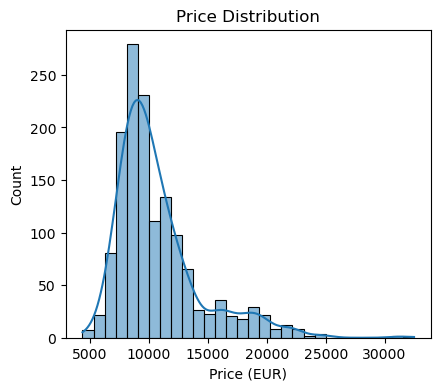

In [52]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Price Distribution'); plt.xlabel('Price (EUR)')


Text(0, 0.5, 'Price')

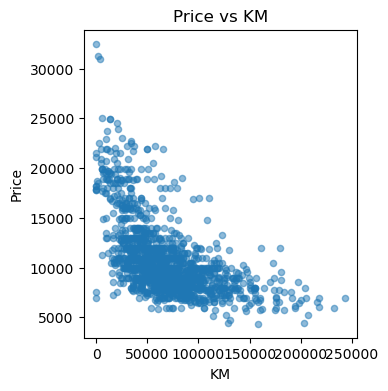

In [53]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,2)
plt.scatter(df['KM'], df['Price'], alpha=0.5, s=20)
plt.title('Price vs KM'); plt.xlabel('KM'); plt.ylabel('Price')

Text(0.5, 1.0, 'Price by FuelType')

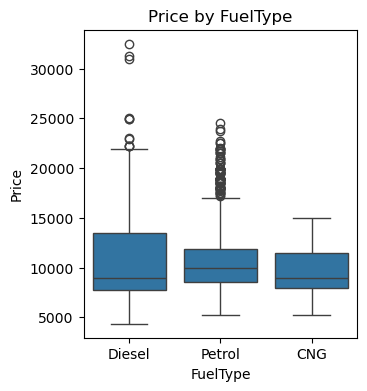

In [54]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,3)
sns.boxplot(x='FuelType', y='Price', data=df)
plt.title('Price by FuelType')

In [55]:
plt.tight_layout()
plt.savefig(('eda_plots.png'), dpi=200)
plt.close()

##### 2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [57]:
numeric_features = ['Age','KM','HP','CC','Doors','Weight','Quarterly_Tax','Automatic']
categorical_features = ['FuelType'] 

In [59]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
])


In [60]:
X = df[numeric_features + categorical_features]
y = df['Price']


In [61]:
X_pre = preprocessor.fit_transform(X)


In [64]:
ohe = preprocessor.named_transformers_['cat']
try:
    ohe_feature_names = ohe.get_feature_names_out(categorical_features).tolist()
except Exception:
    categories = ohe.categories_[0][1:] 
    ohe_feature_names = [f"FuelType_{c}" for c in categories]

In [65]:
feature_names = numeric_features + ohe_feature_names
X_pre_df = pd.DataFrame(X_pre, columns=feature_names)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_pre_df, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1148, 10), (288, 10), (1148,), (288,))

#### 3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build a minimum of 3 different models.

In [68]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

#### 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [69]:
def eval_and_report(name, y_true, y_pred):
    m_rmse = rmse(y_true, y_pred)
    m_mae = mean_absolute_error(y_true, y_pred)
    m_r2 = r2_score(y_true, y_pred)
    print(f"{name}: RMSE={m_rmse:.2f}, MAE={m_mae:.2f}, R2={m_r2:.4f}")
    return {'RMSE': m_rmse, 'MAE': m_mae, 'R2': m_r2}

In [79]:
model_a = LinearRegression()
model_a.fit(X_train, y_train)
y_pred_a = model_a.predict(X_test)
metrics_a = eval_and_report("OLS_all", y_test, y_pred_a)

OLS_all: RMSE=1497.03, MAE=992.93, R2=0.8320


In [100]:
y_log = np.log1p(y)  
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_pre_df, y_log, test_size=0.2, random_state=42)
model_b = LinearRegression()
model_b.fit(X_train_b, y_train_b)
y_pred_b_log = model_b.predict(X_test_b)
y_pred_b = np.expm1(y_pred_b_log)  
metrics_b = eval_and_report("OLS_log_backtrans", y_test, y_pred_b)


OLS_log_backtrans: RMSE=1294.70, MAE=873.92, R2=0.8744


In [81]:
selected = ['Age','KM','HP','Automatic','CC'] + [c for c in feature_names if 'FuelType' in c]
X_sel = X_pre_df[selected]
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_sel, y, test_size=0.2, random_state=42)
model_c = LinearRegression()
model_c.fit(X_train_c, y_train_c)
y_pred_c = model_c.predict(X_test_c)
metrics_c = eval_and_report("OLS_selected", y_test_c, y_pred_c)

OLS_selected: RMSE=1468.81, MAE=1078.61, R2=0.8383


#### 5.Apply Lasso and Ridge methods on the model.

In [83]:
alphas = np.logspace(-3, 3, 50)

lasso_cv = LassoCV(alphas=None, cv=5, random_state=42, max_iter=5000).fit(X_train, y_train)
ridge_cv = RidgeCV(alphas=alphas, cv=5).fit(X_train, y_train)

In [84]:
y_pred_lasso = lasso_cv.predict(X_test)
y_pred_ridge = ridge_cv.predict(X_test)

In [85]:
metrics_lasso = eval_and_report("LassoCV", y_test, y_pred_lasso)
metrics_ridge = eval_and_report("RidgeCV", y_test, y_pred_ridge)

LassoCV: RMSE=1408.48, MAE=996.22, R2=0.8513
RidgeCV: RMSE=1440.05, MAE=995.25, R2=0.8446


In [86]:
lasso_cv.alpha_

np.float64(60.091560511207526)

In [87]:
ridge_cv.alpha_

np.float64(79.06043210907701)

In [88]:
coef_df = pd.DataFrame({
    'feature': feature_names,
    'coef_OLS_all': model_a.coef_
}).sort_values(by='coef_OLS_all', key=lambda s: s.abs(), ascending=False)

In [92]:
coef_df.head(10)

,feature,coef_OLS_all
0,Age,-2245.594452
9,FuelType_Petrol,1470.300431
5,Weight,1375.219180
1,KM,-598.534212
2,HP,235.302058
3,CC,-115.599860
6,Quarterly_Tax,114.878852
4,Doors,-80.576167
7,Automatic,17.833115
8,FuelType_Diesel,8.475170


In [90]:
coef_sel_df = pd.DataFrame({
    'feature': selected,
    'coef_OLS_selected': model_c.coef_
}).sort_values(by='coef_OLS_selected', key=lambda s: s.abs(), ascending=False)
coef_sel_df.head()

,feature,coef_OLS_selected
5,FuelType_Diesel,2726.429846
0,Age,-2623.579732
2,HP,830.272397
1,KM,-686.970530
6,FuelType_Petrol,618.243439


In [91]:
lasso_coef_df = pd.DataFrame({'feature': feature_names, 'coef_lasso': lasso_cv.coef_})
lasso_coef_df

,feature,coef_lasso
0,Age,-2229.854477
1,KM,-713.457220
2,HP,393.364814
3,CC,-0.000000
4,Doors,0.000000
5,Weight,979.229866
6,Quarterly_Tax,-0.000000
7,Automatic,14.624191
8,FuelType_Diesel,-0.000000
9,FuelType_Petrol,0.000000


In [93]:
ridge_coef_df = pd.DataFrame({'feature': feature_names, 'coef_ridge': ridge_cv.coef_})
ridge_coef_df

,feature,coef_ridge
0,Age,-2090.415439
1,KM,-736.208443
2,HP,359.541356
3,CC,-57.183047
4,Doors,-11.439394
5,Weight,1128.421155
6,Quarterly_Tax,52.601074
7,Automatic,42.381924
8,FuelType_Diesel,-140.804656
9,FuelType_Petrol,313.596625


In [94]:
predictions_out = pd.DataFrame({
    'actual': y_test,
    'pred_OLS_all': y_pred_a,
    'pred_OLS_log_back': y_pred_b,
    'pred_OLS_sel': np.nan,
    'pred_lasso': y_pred_lasso,
    'pred_ridge': y_pred_ridge
}, index=y_test.index)
predictions_out.loc[X_test_c.index, 'pred_OLS_sel'] = y_pred_c
predictions_out

,actual,pred_OLS_all,pred_OLS_log_back,pred_OLS_sel,pred_lasso,pred_ridge
594,10800,11160.289346,10985.604596,11903.058813,11327.303647,11254.456454
754,9950,9066.545864,8845.975435,9030.457522,8966.079776,9054.369959
630,7500,9212.974998,8709.564537,9409.196696,9592.628097,9381.444554
1259,9250,8869.858543,8748.714441,8688.246962,8969.649272,9043.104019
903,9750,10082.049025,9749.043968,9846.339934,10105.741566,10197.841145
...,...,...,...,...,...,...
174,21950,19229.064263,20610.048165,18790.832456,18901.466895,18770.213523
1428,8450,8041.079369,8446.256646,8120.915814,8147.302582,8247.558445
297,12850,13380.866366,12855.289307,13697.480161,13533.015239,13401.574348
1435,6950,10737.518838,10123.384084,9375.224963,10634.965709,10966.423525


In [95]:
metrics_summary = pd.DataFrame.from_dict({
    'OLS_all': metrics_a,
    'OLS_log_backtrans': metrics_b,
    'OLS_selected': metrics_c,
    'LassoCV': metrics_lasso,
    'RidgeCV': metrics_ridge
}, orient='index')
metrics_summary

,RMSE,MAE,R2
OLS_all,1497.033210,992.929557,0.832036
OLS_log_backtrans,1294.697227,873.923708,0.874371
OLS_selected,1468.808467,1078.614376,0.838310
LassoCV,1408.477750,996.221800,0.851320
RidgeCV,1440.049695,995.252222,0.844579


In [98]:
def save_scatter(y_true, y_pred, title):
    plt.figure(figsize=(6,5))
    plt.scatter(y_true, y_pred, alpha=0.6, s=20)
    mn = min(y_true.min(), y_pred.min())
    mx = max(y_true.max(), y_pred.max())
    plt.plot([mn,mx],[mn,mx],'k--', linewidth=1)
    plt.xlabel('Actual Price'); plt.ylabel('Predicted Price'); plt.title(title)
    plt.show()

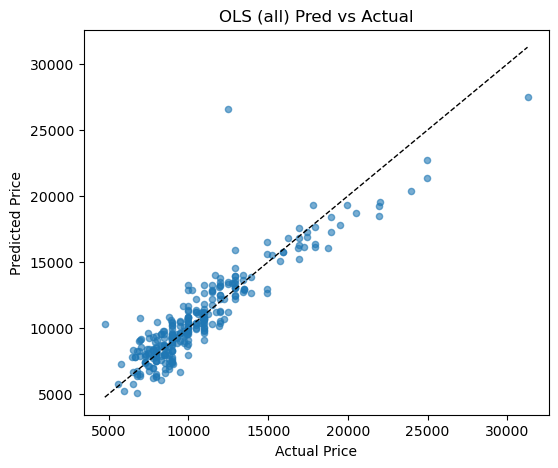

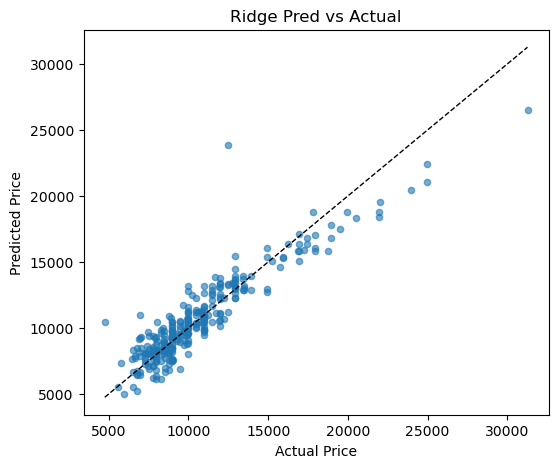

In [99]:
save_scatter(y_test, y_pred_a, 'OLS (all) Pred vs Actual')
save_scatter(y_test, y_pred_ridge, 'Ridge Pred vs Actual')

### Interview Questions:

##### 1.What is Normalization & Standardization and how is it helpful?

##### 
- Normalization:
    - Scales data to [0,1] range using (x - min) / (max - min).
    - Useful for distance-based models (e.g., k-NN, Neural Nets).

- Standardization:
    - Centers and scales data: (x - mean) / std.
    - Produces zero mean and unit variance.
    - Used here for Linear Regression because it ensures all coefficients are comparable and improves model stability..

#### 2.What techniques can be used to address multicollinearity in multiple linear regression?

##### - Techniques to address multicollinearity:

- Remove or combine highly correlated features (e.g., if CC and Cylinders correlate strongly, drop one or create an aggregate).
- Principal Component Regression / PCA: transform features into orthogonal components.
- Regularization (Ridge reduces coefficient magnitude; Lasso can set some coefficients to zero).
- Variance Inflation Factor (VIF) analysis: detect variables with high VIF and consider removal.
- Use domain knowledge to prefer one of correlated variables.

In [101]:
assumptions = {
    "1. Linearity": "We assume a linear relationship between independent variables and the target Price.",
    "2. Independence": "Each car observation is independent — no repeated entries.",
    "3. Homoscedasticity": "Variance of residuals is constant across fitted values. Violation leads to unreliable standard errors.",
    "4. Normality of residuals": "Errors are assumed normally distributed for valid confidence intervals.",
    "5. Multicollinearity": "Some variables (e.g., CC and HP) might be correlated — Ridge/Lasso helps mitigate this."
}

for k,v in assumptions.items():
    print(f"{k} → {v}")

1. Linearity → We assume a linear relationship between independent variables and the target Price.
2. Independence → Each car observation is independent — no repeated entries.
3. Homoscedasticity → Variance of residuals is constant across fitted values. Violation leads to unreliable standard errors.
4. Normality of residuals → Errors are assumed normally distributed for valid confidence intervals.
5. Multicollinearity → Some variables (e.g., CC and HP) might be correlated — Ridge/Lasso helps mitigate this.
